In [ ]:
#classification des genres par époque, MED,PSY, AUTRES, grâce à liste de mots cles dans titres

In [16]:
ep1 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1810-1840.conllu"
ep2 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1841-1913.conllu"
ep3 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1914-2009.conllu"

In [17]:
def genre(file, psycho, meds):
    med = 0
    psy = 0
    autres = 0
    with open (file, "r") as f:
        lines = f.readlines()
        for i in range(len(lines) - 1):
            if lines[i].startswith("# title =") and lines[i + 1].strip() != "# Genre = FIC":
                if any(word in lines[i].lower() for word in psycho):
                    psy += 1
                elif any(word in lines[i].lower() for word in meds):
                    med += 1
                else:
                    autres += 1
            else:
                continue
    return psy, med, autres
        

In [18]:
med_words = ["dermatology", "dermatologist", "nurse", "nurses", "mid-wife", "birth", "pregnancy","body parts", "parts of the body", "cell", "biology","chemistry","cells","blood cells", "blood vessels","science", "neuroscience","immune","immune system", "biology", "chemistry","meds", "pharmacy","pharmacetics","medecine", "medecines", "medical","doctor", "doctors", "brains", "brain functions", "functions of the brain", "arthritis", "physiology", "health", "body", "neurology", "psychiatry", "ontology","pediatrician", "pediatrics","surgery", "surgeon", "neurosurgeon","hospital", "dermatology", "wound", "surgery", "clinical","psychic"]

In [19]:
psy_words = ["behavioral science", "childhood development", "stress", "psychic pathology", "psychic pathologies", "psychology", "psychologist", "psychologists", "behavior", "behaviour", "addiction","depression", "mental health", "mentality", "conscience", "subconscient","trauma", "Freud", "posttraumatic", "ptds","disorder"]

In [20]:
files = [ep1, ep2,ep3]
for f in files:
    print(genre(f, psy_words, med_words))

(0, 35, 1332)
(39, 286, 6163)
(194, 900, 10435)


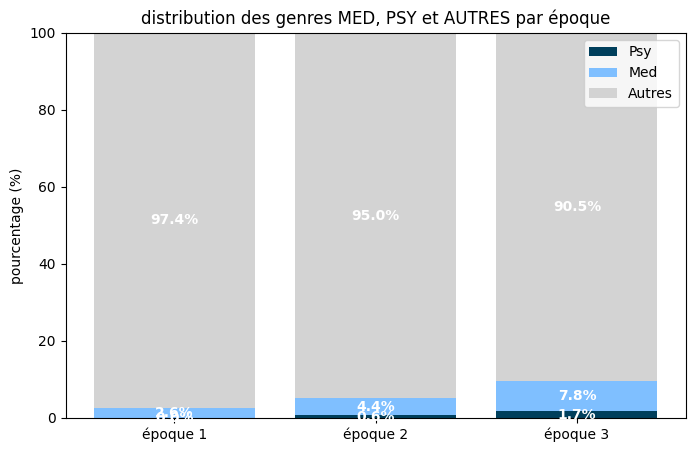

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_genre_distribution(files, psycho_words, med_words):
    psy_counts = []
    med_counts = []
    autres_counts = []
    
    for file in files:
        psy, med, autres = genre(file, psycho_words, med_words)
        psy_counts.append(psy)
        med_counts.append(med)
        autres_counts.append(autres)
    
    total_counts = np.array(psy_counts) + np.array(med_counts) + np.array(autres_counts)
    psy_percents = np.array(psy_counts) / total_counts * 100
    med_percents = np.array(med_counts) / total_counts * 100
    autres_percents = np.array(autres_counts) / total_counts * 100
    
    epochs = [f"époque {i+1}" for i in range(len(files))]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(epochs, psy_percents, label="Psy", color="#003f5c")      # Dunkelblau
    bars2 = ax.bar(epochs, med_percents, bottom=psy_percents, label="Med", color="#7fbfff")  # Hellblau
    bars3 = ax.bar(epochs, autres_percents, bottom=psy_percents + med_percents, label="Autres", color="#d3d3d3")  # Hellgrau
    
    for bars, values in zip([bars1, bars2, bars3], [psy_percents, med_percents, autres_percents]):
        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{value:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    ax.set_ylabel("pourcentage (%)")
    ax.set_title("distribution des genres MED, PSY et AUTRES par époque")
    ax.set_ylim(0, 100)
    ax.legend()
    
    plt.savefig("/home/port-pret-etu01/Documents/LATTICE/méta/output/genres_epoque.png")
    plt.show()

    
plot_genre_distribution(files, psy_words,med_words)